## Loading the Data

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme 
sns.set()
df = pd.read_csv("palmer_penguins.csv")

# Processing the data
df = df.dropna()

# Creating feature matrix
X = df[["bill_length_mm", "bill_depth_mm"]].to_numpy()
y = df.species

In [4]:
from sklearn.cluster import KMeans

def species_to_num(y):
    if y=="Adelie":
        return 0
    elif y=="Gentoo":
        return 1
    else:  
        return 2


#instantiating a K-means clustering model and fit the feature matrix
model = KMeans(n_clusters=3)
model.fit(X)

labels = model.predict(X)
df["predicted_label"] = labels
df["actual_label"] = df.species.apply(species_to_num)

# Observing the data and new labels (predicted and actual)
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,predicted_label,actual_label
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,0
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,0
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,0
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,0
5,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,0


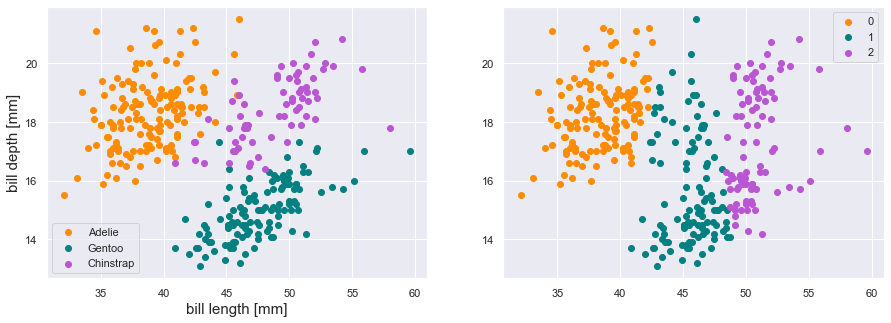

In [5]:
penguins = ["Adelie", "Gentoo", "Chinstrap"]
colors = ["darkorange", "teal", "mediumorchid"]
label = [0,1,2]

# Lets see how our K-Means Clustering fared visually
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
for species,labelss, color in zip(penguins, label,colors):
    temp_df = df[df.species == species]
    pred_df = df[df.predicted_label == labelss]
    ax1.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = species, 
               )
    ax2.scatter(pred_df.bill_length_mm,
               pred_df.bill_depth_mm,
               c = color,
               label = labelss, 
               )
    
ax1.set_xlabel("bill length [mm]", fontsize = 15)
ax1.set_ylabel("bill depth [mm]", fontsize = 15)
ax1.legend()
ax2.legend()
plt.show()

It seems likes the Adelie grouping did the best. While the Gentoo and Chinstrap groups show a lot of mixing. <br> <br> 
Lets see if we can show this in tabular form.

In [8]:
matrix = pd.DataFrame({'labels': labels, 'species': y})
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

species  Adelie  Chinstrap  Gentoo
labels                            
0           135          1       0
1            11         27      74
2             0         40      45


It seems like the Adelie group fared the best followed by Gentoo and then Chinstrap.<br><br>
Lets see if we can do better if we scale the data.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Pipeline that scales the input data and normalizes it
scaler = StandardScaler()
pipeline = make_pipeline (scaler, model)

pipeline.fit(X)
labels_new = pipeline.predict(X)

matrix_new = pd.DataFrame({'labels': labels_new, 'species': y})
ct_new = pd.crosstab(matrix_new['labels'], matrix_new['species'])
print(ct_new)

species  Adelie  Chinstrap  Gentoo
labels                            
0           142          5       1
1             0          9     112
2             4         54       6


Wow! That's so much better already. Told ya scaling was important!
<br><br>
Lets see how the groups look visually.

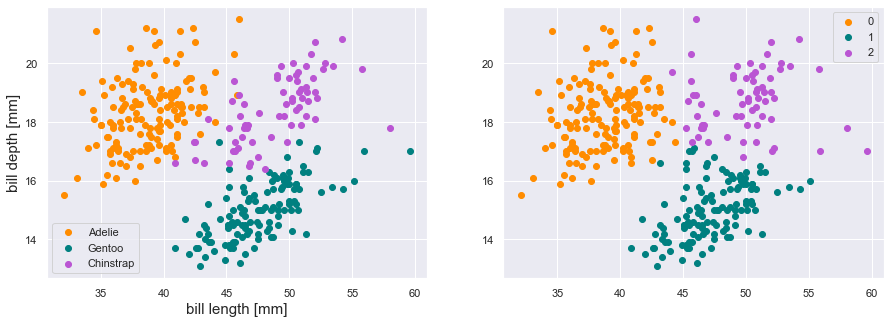

In [11]:
df["new_predicted_label"] = labels_new

penguins = ["Adelie", "Gentoo", "Chinstrap"]
colors = ["darkorange", "teal", "mediumorchid"]
label = [0,1,2]

#  K-Means Clustering with scaled input matrix visually
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
for species,labelss, color in zip(penguins, label,colors):
    temp_df = df[df.species == species]
    pred_df = df[df.new_predicted_label == labelss]
    ax1.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = species, 
               )
    ax2.scatter(pred_df.bill_length_mm,
               pred_df.bill_depth_mm,
               c = color,
               label = labelss, 
               )
    
ax1.set_xlabel("bill length [mm]", fontsize = 15)
ax1.set_ylabel("bill depth [mm]", fontsize = 15)
ax1.legend()
ax2.legend()
plt.show()

This is a particularly important algorithm because it is an example of unsupervised learning. Data often doesn't come with target data in hand so an algorithm like this serves a strong purpose. <br><br>
Also, the fact that scaling and normalizing the data had such a huge effect on the final grouping hammers in the importance of pre-processing our data.